# Lending Club Case Study - Exploratory Data Analysis

## Group Member
Radhika G
Prathiba Srivatsava 
MLC63


In [112]:
#IMPORTING AND GETTING A QUICK OVERVIEW OF DATA
import pandas as pd
import numpy as np

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# Purpose to suppress warnings
import warnings
warnings.filterwarnings('ignore')

dfLoan = pd.read_csv('loan.csv')

#DATA CLEANING 
#DROPPING  OUT COLUMNS WHICH HAVE ALL NULL VALUES AND DELETE THEM
newdf = dfLoan.dropna(axis=1, how='all')
dfLoan = newdf
dfLoan.isna().sum()

#removing characters and converting to numeric 
dfLoan["revol_util"]=dfLoan["revol_util"].str[:-1]
dfLoan["revol_util"] = pd.to_numeric(dfLoan["revol_util"])

dfLoan["int_rate"]=dfLoan["int_rate"].str[:-1]
dfLoan["int_rate"] = pd.to_numeric(dfLoan["int_rate"])

dfLoan["term"]=dfLoan["term"].str[:-6]
dfLoan["term"] = pd.to_numeric(dfLoan["term"])

dfLoan = dfLoan.replace('< 1 year', '0 years', regex=True)
dfLoan = dfLoan.replace('10+ years','10 years', regex=False)

dfLoan["emp_length"]=dfLoan["emp_length"].str[:-5]
dfLoan["emp_length"] = pd.to_numeric(dfLoan["emp_length"])


#CHECKING FOR NULL VALUES IN  NUMERICAL AND CATEGORICAL COLUMN 
dfLoan[num_column].isnull().sum()
dfLoan = dfLoan[dfLoan['revol_util'].notna()] #dropping since values are very small
dfLoan = dfLoan[dfLoan['pub_rec_bankruptcies'].notna()] #dropping since values are very small


dfLoan[categorical_column].isnull().sum()
dfLoan = dfLoan[dfLoan['title'].notna()] #dropping since values are very small
dfLoan = dfLoan[dfLoan['emp_length'].notna()] #dropping since values are very small



In [113]:
# Find unique values in columns
print("unique emp_title : %d"  % len(dfLoan.emp_title.unique()))
print("unique emp_length : %d"  % len(dfLoan.emp_length.unique()))
print("unique title : %d"  % len(dfLoan.title.unique()))
print("unique revol_util : %d"  % len(dfLoan.revol_util.unique()))
print("unique title : %d"  % len(dfLoan.title.unique()))
print("unique last_pymnt_d : %d"  % len(dfLoan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(dfLoan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(dfLoan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(dfLoan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(dfLoan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(dfLoan.tax_liens.unique()))



unique emp_title : 28255
unique emp_length : 11
unique title : 18702
unique revol_util : 1087
unique title : 18702
unique last_pymnt_d : 98
unique last_credit_pull_d : 98
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 3
unique tax_liens : 1


In [114]:
#The columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens has either value of 0 or nan(no entry/blank). 
#We can decide to drop these columns for analysis.
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
dfLoan = dfLoan.drop(drop_columnlist,axis=1)

In [115]:
dfLoan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.00,Jan-15,171.62,NaN,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1.11,Apr-13,119.66,NaN,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.00,Jun-14,649.91,NaN,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.00,Jan-15,357.48,NaN,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.00,May-16,67.79,Jun-16,May-16,1,INDIVIDUAL,0,0,0.0


In [116]:
dfLoan.nunique().sort_values()

initial_list_status            1
acc_now_delinq                 1
application_type               1
policy_code                    1
pymnt_plan                     1
delinq_amnt                    1
term                           2
next_pymnt_d                   2
loan_status                    3
verification_status            3
pub_rec_bankruptcies           3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     81
mths_since_last_delinq        95
last_credit_pull_d            97
last_pymnt_d                  97
mths_since_last_record       108
int_rate                     337
earliest_cr_line             514
zip_code                     809
loan_amnt 

In [117]:
#Above are columns with single unique value which may not contribute much to analysis
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
dfLoan= dfLoan.drop(columns_tobe_dropped,axis=1)

# Anaysis
 since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

## Univariate and Segmented Univariate Analysis

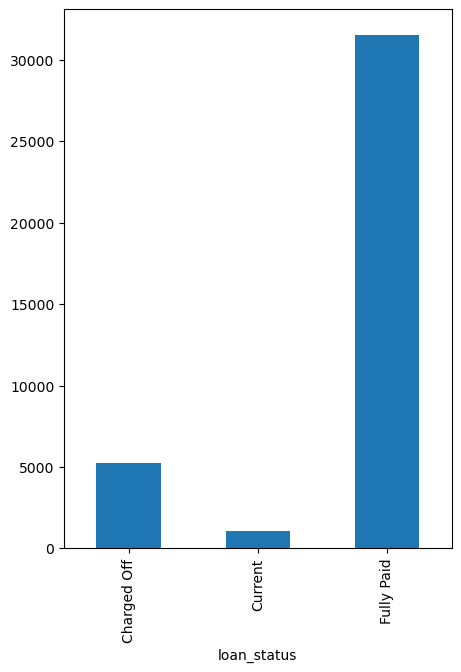

In [118]:
plt.figure(figsize=(5,7))
ax = dfLoan.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

In [119]:
dfLoan = dfLoan[dfLoan['loan_status'].isin(['Fully Paid','Charged Off'])]
dfLoan.shape

(36790, 42)

In [120]:
print("%.2f" % (dfLoan.loc[dfLoan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(dfLoan)))

14.31


14.17 % of loans in the dataset are defaulted.
Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. (16.5 is 18% higher than 13.97 - a large enough increase)

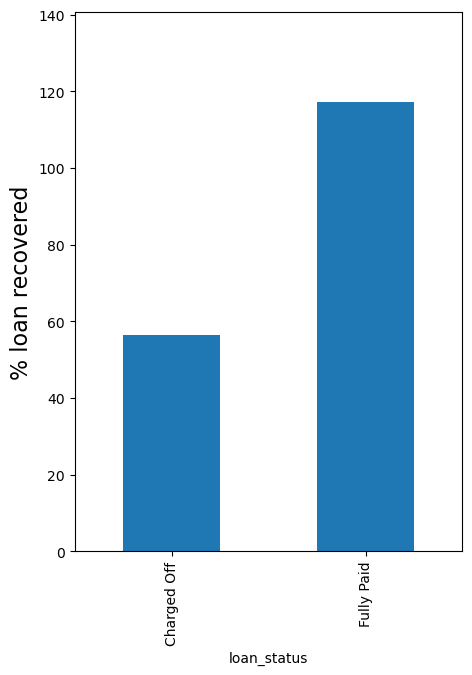

In [121]:
plt.figure(figsize=(5,7))
ax = (dfLoan.groupby('loan_status').total_pymnt.sum() * 100 / dfLoan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)

Observation : Lending Club only recovers 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit.

In [122]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [123]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [124]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [125]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (dfLoan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (dfLoan.loc[dfLoan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [126]:
#Create Derived categorical variable
dfLoan['loan_amnt_bin'] = pd.cut(dfLoan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


<Axes: xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

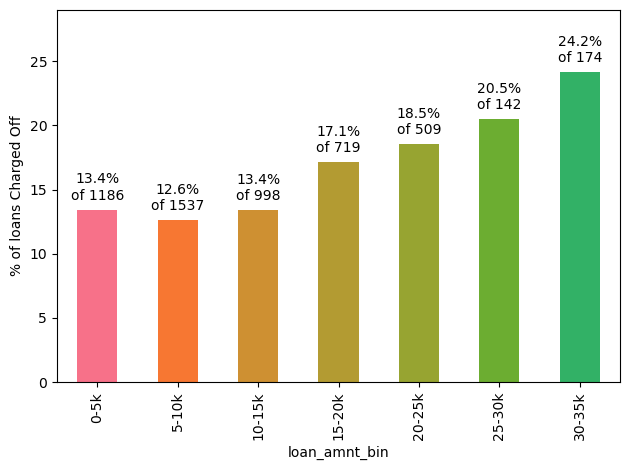

In [127]:
plotLoanStatus(dfLoan, 'loan_amnt_bin')

Observation:

The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.

In [128]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

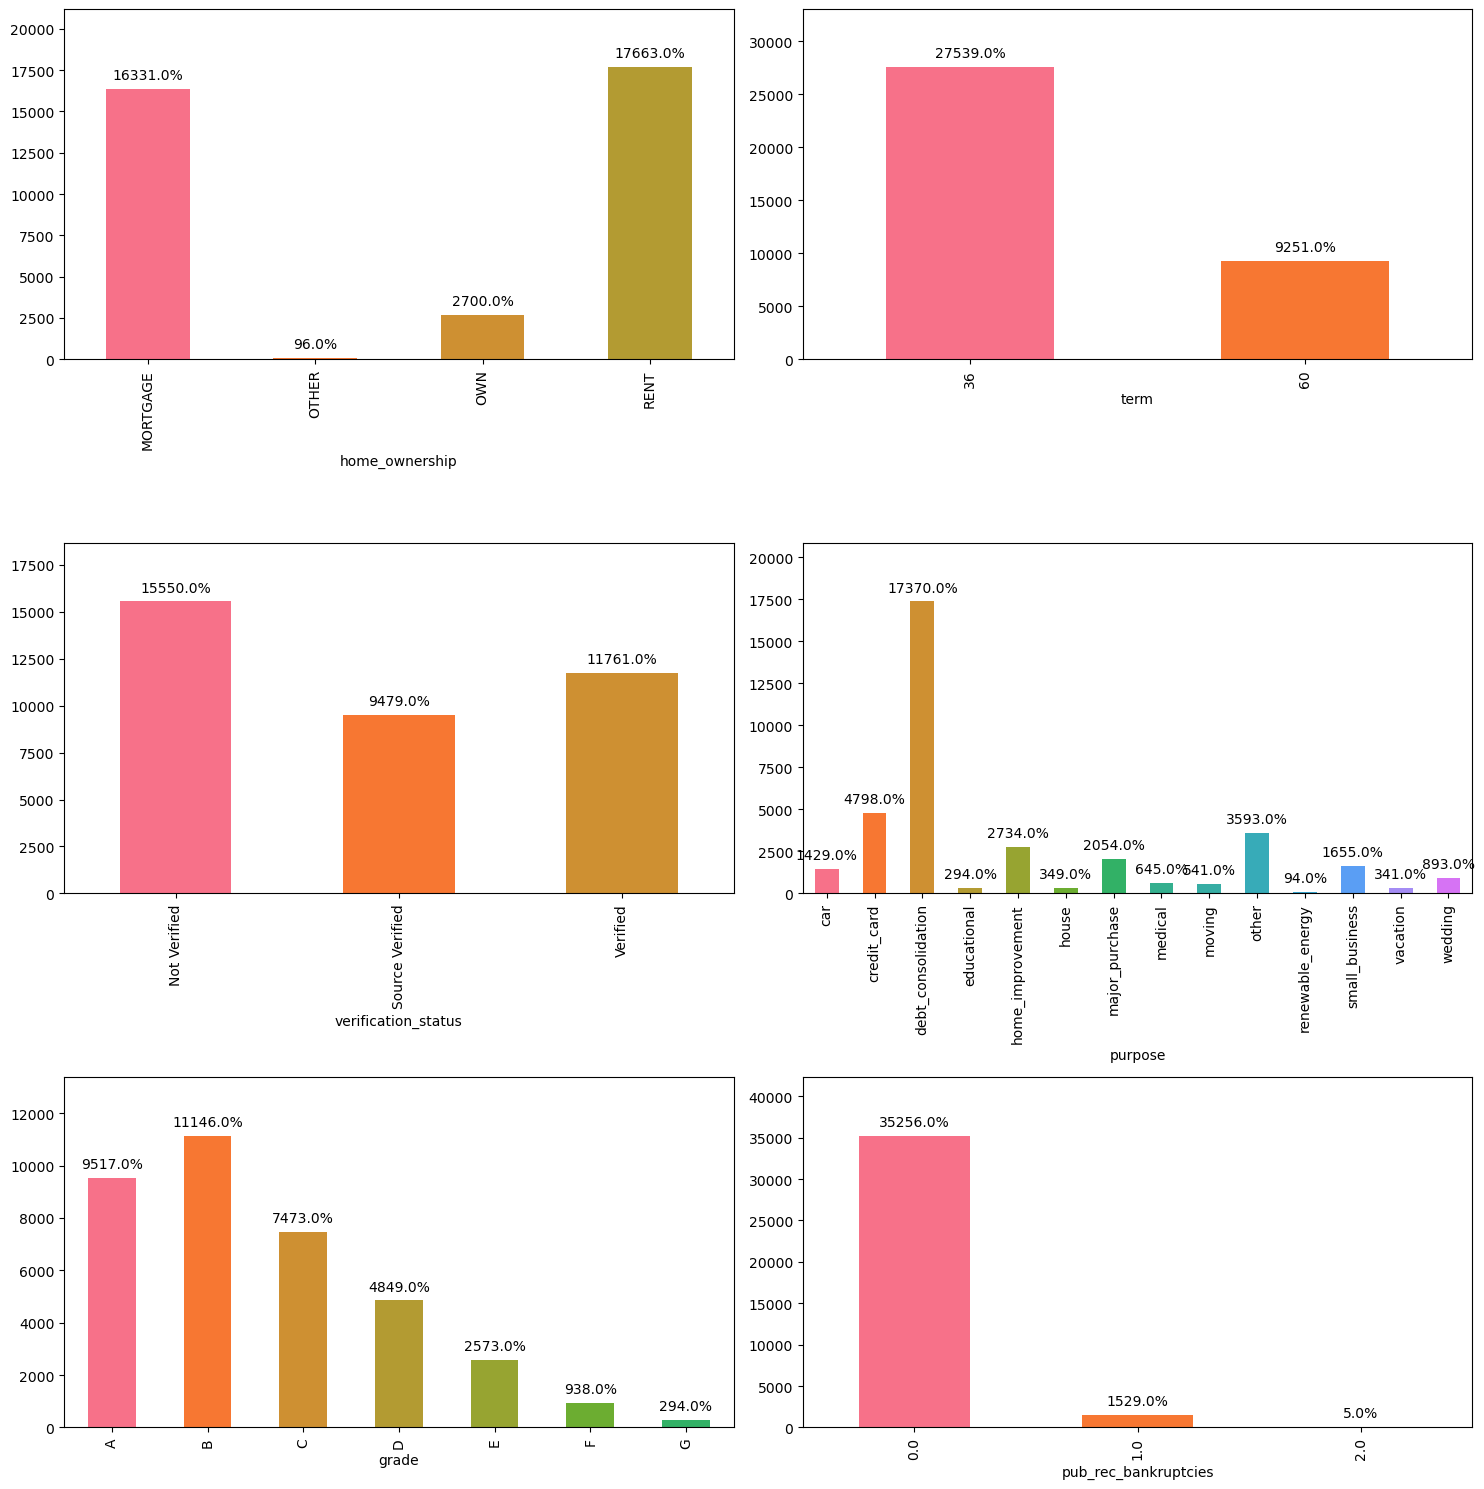

In [129]:
plt.figure(figsize=(15,15))

categoricalBarPlots(dfLoan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

Obervation

Most loans are for 36 month term
Very few loans are extended to people with prior record of bankruptcy
debt_consolidation is by far the largest 'purpose' for seeking a loan
Most approved loans are high grade
We should investigate the frequencies of defaults by term, purpose and prior record of bankruptc

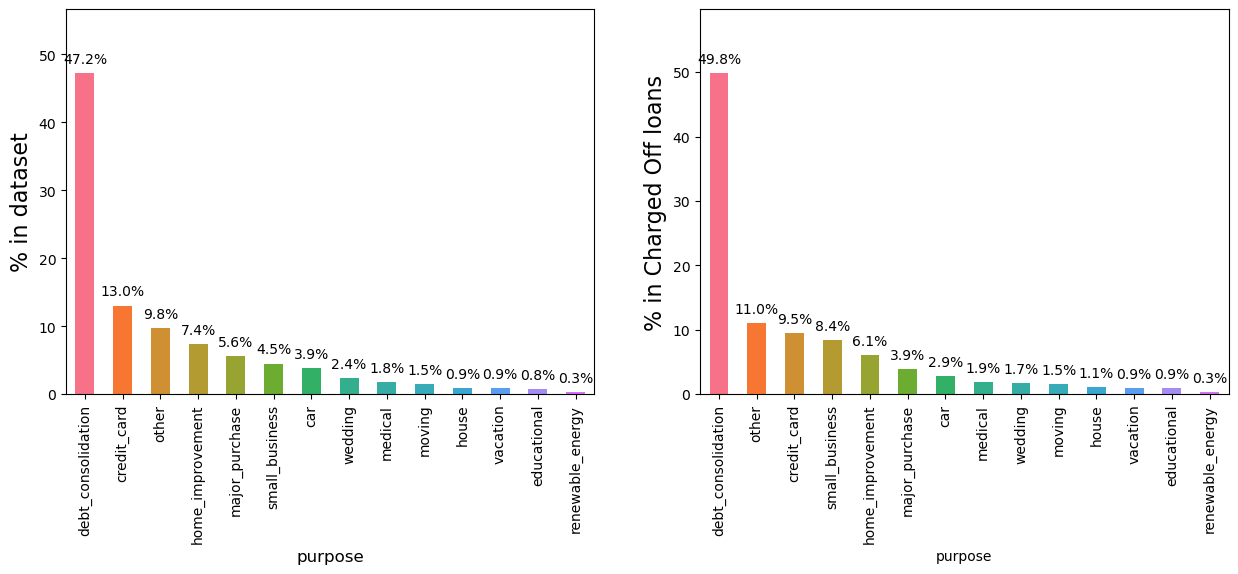

In [130]:
plt.figure(figsize=(15,5))
plot_percentages(dfLoan, 'purpose')

Observation:

The category 'small_business' percentage doubles from 3.8 to 7.2 for Charged Off loans. Let's see how the categories of this variable behave.

Variable: pub_rec_bankruptcy
Data_Dictionary: Number of public record bankruptcies

<Axes: xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

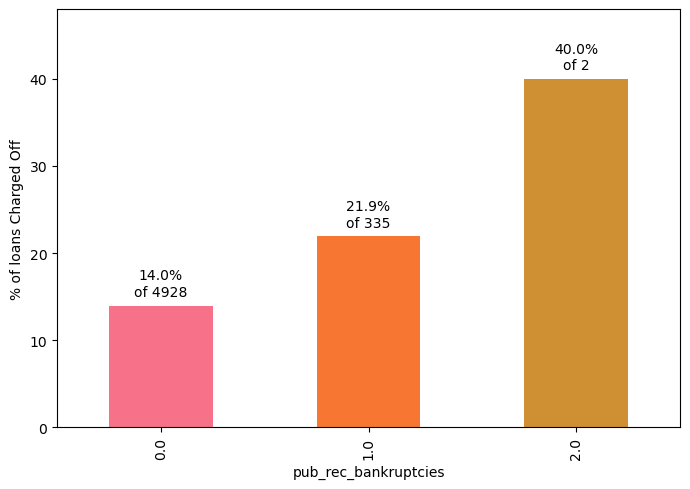

In [131]:
plt.figure(figsize=(7,5))
plotLoanStatus(dfLoan, 'pub_rec_bankruptcies')

In [132]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

<Figure size 1500x500 with 0 Axes>

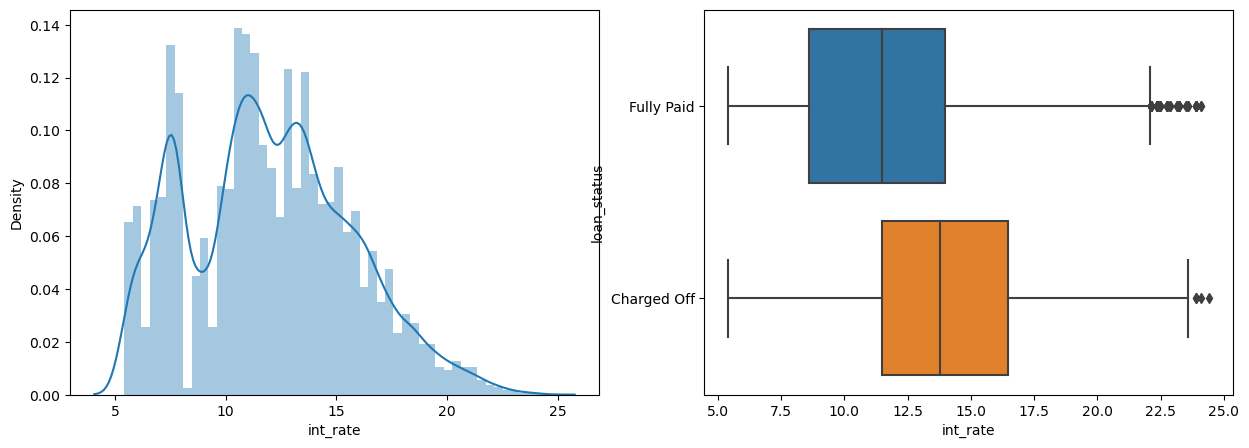

In [133]:
plt.figure(figsize=(15,5))
plot_distribution(dfLoan, 'int_rate')

In [98]:
dfLoan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5265.0,13.924435,3.651870,5.42,11.49,13.79,16.45,24.40
Fully Paid,31525.0,11.659022,3.608944,5.42,8.59,11.49,13.99,24.11


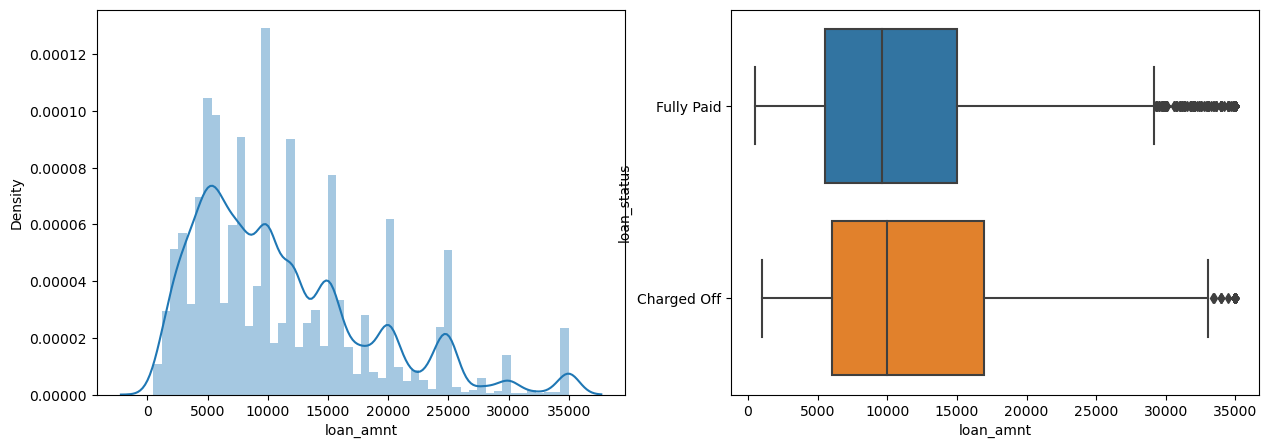

In [99]:
plot_distribution(dfLoan, 'loan_amnt')

Observation:

Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
Funding amounts see a spike around each 5000 boundary. We will use 5000 as bucket size for later analysis.
Charged off loans are shifted towards higher average loan amount request.

In [100]:
#Create Derived categorical variable
dfLoan['loan_amnt_bin'] = pd.cut(dfLoan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


<Axes: xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

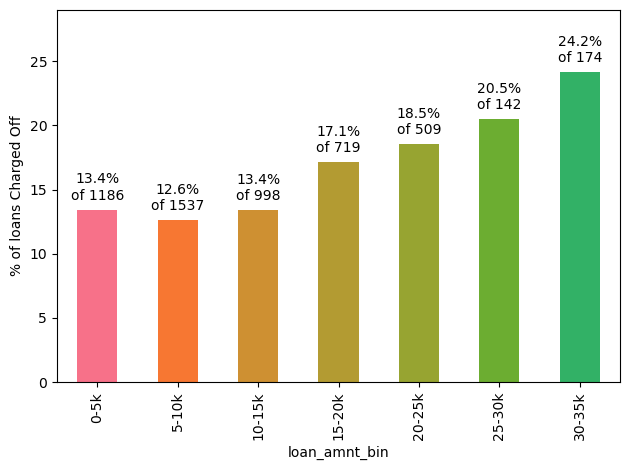

In [101]:
plotLoanStatus(dfLoan, 'loan_amnt_bin')

Observation:

The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.


<Axes: title={'center': 'int_rate'}, xlabel='grade'>

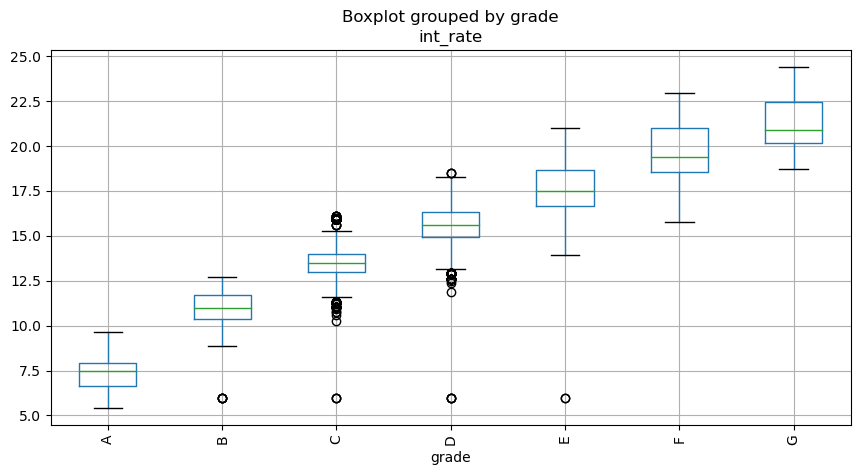

In [102]:
fig, ax = plt.subplots(figsize=(10,5))
dfLoan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

Observation:

Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans.

In [103]:
top10_emp_title = dfLoan.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

emp_title
US Army              129
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Wells Fargo           52
UPS                   52
USAF                  51
US Air Force          50
Walmart               44
Name: count, dtype: int64

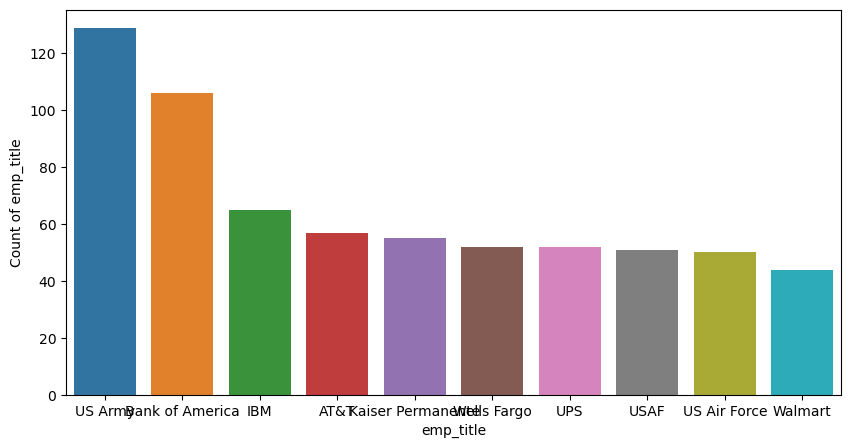

In [104]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

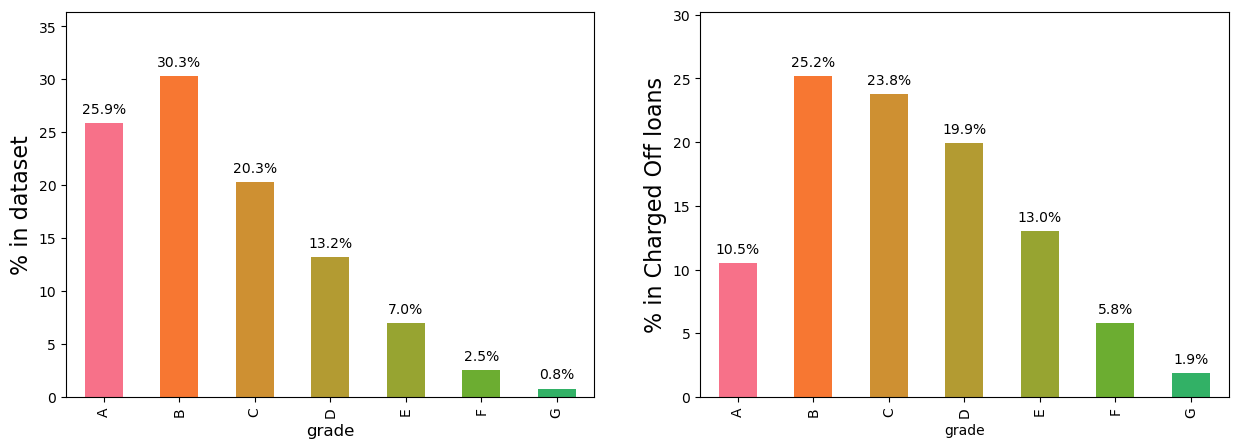

In [105]:
plt.figure(figsize=(15,5))
plot_percentages(dfLoan, 'grade', True)

Observation:

Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
Grade D, E, F, G loans are less safe. We should plot grade by percentage Charged Off by category
Lending Clubs grading system is working well.

<Axes: xlabel='grade', ylabel='% of loans Charged Off'>

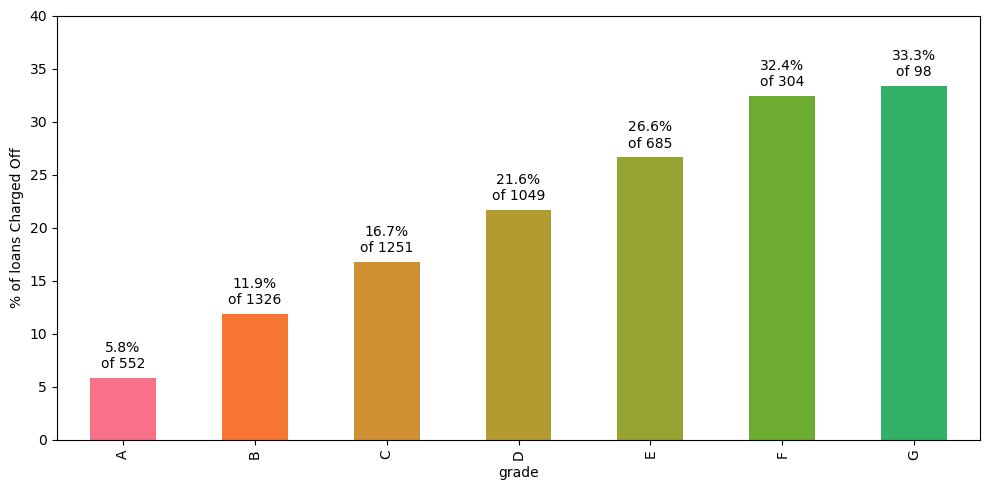

In [106]:
plt.figure(figsize=(10,5))
plotLoanStatus(dfLoan, 'grade')

Observation:

Nearly 30% of all loans in Grades F and G see a default.
Grade E onwards are risky, and less numerous. Lending Club should either refuse loans or charge high interest rates.